# Explore here

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import *

url = '/workspaces/Time_Series_PereHDZ/sales.csv'

df = pd.read_csv(url, sep=',')

df.to_csv('sales.csv', index=False)

df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [33]:
df.shape

(366, 2)

In [34]:
#Check for empty spaces
df.isna().sum()

date     0
sales    0
dtype: int64

In [35]:
#Check for unique entries
df.nunique()

date     366
sales    366
dtype: int64

In [36]:
#Check the types of entries
df.date = pd.to_datetime(df.date)
df.dtypes

date     datetime64[ns]
sales           float64
dtype: object

In [37]:
#Check the amount of days. It should be 365 (one less than entries, since it doesn't count the first day)
(df.date.max() - df.date.min()).days

365

In [38]:
df.date.nunique()

366

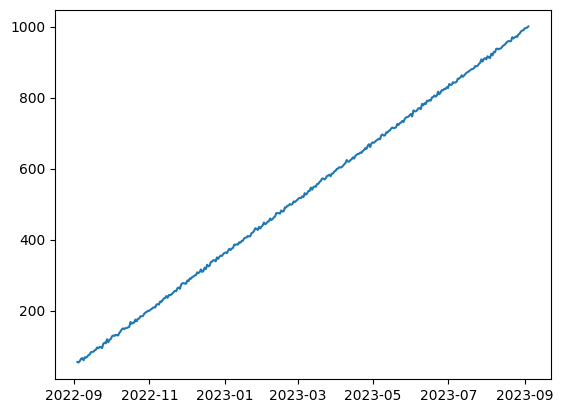

In [39]:
'''The one day difference between both values is the fact that both start and end dates are a unique value, but there are only 365 days
in between them.Thus, we can assume that there are no missing dates in our dataset'''

plt.plot(df.date, df.sales)

In [ ]:
'''The data shows a clear tendency towards increase through time'''

#Data split
df_train, df_test = df.iloc[:-300], df.iloc[-300:]

n = 4
XY_train = np.array([df_train.sales.values[i: i+n] for i in range (len(df_train.sales.values)) if len(df_train.sales.values[i: i+n]) == n])
XY_test = np.array([df_test.sales.values[i: i+n] for i in range (len(df_test.sales.values)) if len(df_test.sales.values[i: i+n]) == n])
X_train, y_train = XY_train[:, : -1], XY_train[:, -1]
X_test, y_test = XY_test[:, : -1], XY_test[:, -1]

X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     260.4
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           1.02e-25
Time:                        09:46:46   Log-Likelihood:                -111.18
No. Observations:                  47   AIC:                             262.4
Df Residuals:                      27   BIC:                             299.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.1644     15.229      2.440      0.0

In [41]:
#None of the dates seem to be statistically significant to make predictions
model = KNeighborsRegressor().fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(r2_score(y_train, y_pred_train), mean_absolute_percentage_error(y_train, y_pred_train) * 100, mean_absolute_error(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test), mean_absolute_percentage_error(y_test, y_pred_test) * 100, mean_absolute_error(y_test, y_pred_test))

0.9921575017798508 1.6806438684752882 2.336160338573352
-4.039918550244201 62.01708566083802 423.49535505861223
